# Prática IA: Algoritmo de Colônia de Formigas


# Dupla: Cristhian Sala Minoves e Willian Silva de Almeida

Implemente o algoritmo de colônia de formigas para resolver o problema do
caixeiro viajante descrito a seguir:

![Mapa dos nós](problema.png)

In [49]:
from colonia import*

In [50]:
#Leitura dos arquivos
lista_cidades=[]
spamreader =pd.read_csv(r'Colonia.csv',sep=';')

#inicializando a matriz de distância com 0
matriz_dist=np.zeros((len(spamreader),len(spamreader)))
print(matriz_dist)


for i, row in spamreader.iterrows():
  lista_cidades.append(row.to_numpy())
#print(lista_cidades)
for i in range(len(matriz_dist)):
  for j in range(len(matriz_dist)):
    x1=lista_cidades[i][1]
    y1=lista_cidades[i][2]
    x2=lista_cidades[j][1]
    y2=lista_cidades[j][2]
    distancia=((x2-x1)**2+(y2-y1)**2)**0.5
    matriz_dist[i][j]=distancia
    
print('Matriz de distâncias')
for i in range(len(matriz_dist)):
  print(end='\n')
  for j in range(len(matriz_dist)):
    print(f'{matriz_dist[i][j]:.2}',end=' ')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Matriz de distâncias

0.0 4.0 8.0 4.1 2.2 2.2 5.1 2.0 2.8 4.5 7.3 4.2 3.2 3.0 4.2 5.8 4.0 6.4 8.9 6.4 5.4 5.8 8.6 6.0 6.3 8.5 7.6 7.1 8.1 9.9 8.1 9.4 
4.0 0.0 4.0 8.1 6.1 2.2 1.4 4.5 2.8 2.0 3.6 7.6 5.8 5.0 3.2 3.2 5.7 4.1 5.7 9.4 7.8 5.1 5.8 7.2 6.3 6.3 9.9 7.6 7.0 7.6 9.4 8.1 
8.0 4.0 0.0 1.2e+01 1e+01 6.1 3.2 8.2 6.3 4.5 2.2 1.1e+01 9.5 8.5 5.8 4.2 8.9 5.0 4.0 1.3e+01 1.1e+01 7.1 5.1 1e+01 8.5 6.3 1.3e+01 9.9 8.1 7.1 1.2e+01 8.5 
4.1 8.1 1.2e+01 0.0 2.0 6.0 9.0 4.1 6.1 8.1 1.1e+01 2.2 3.6 4.5 7.3 9.2 5.0 9.5 1.2e+01 4.0 4.5 8.1 1.2e+01 6.4 7.8 1.1e+01 6.1 7.8 1e+01 1.3e+01 7.6 1.1e+01 
2.2 6.1 1e+01 2.0 0.0 4.0 7.0 2.2 4.1 6.1 9.1 2.2 2.2 2.8 5.4 7.3 3.6 7.6 1e+01 4.5 4.0 6.4 9.8 5.4 6.4 9.4 6.1 6.7 8.5 1.1e+01 7.1 9.9 
2.2 2.2 6.1 6.0 4.0 0.0 3.0 2.2 1.0 2.2 5.1 5.4 3.6 2.8 2.2 3.6 3.6 4.2 6.7 7.2 5.7 4.1 6.4 5.4 5.0 6.4 7.8 6.1

In [51]:
#matriz de feromônios
matriz_fero= np.ones((len(spamreader),len(spamreader)))

# A classe Formiga é inicializada com a cidade de origem e as matrizes de distancias e de feromônios
f=Formiga(0,matriz_dist,matriz_fero)
# Os valores de Q,alpha e beta podem ser alterados.. por padrão eles estão setados em 1
#f=Formiga(0,matriz_dist,matriz_fero,Q=1,alpha=1,beta=1)
print(f.distancia_trajeto)
# O metodo gerar_trajeto realiza uma interação para esssa fomiga
'''  def gerar_trajeto(self): 
    while True:
      l=self.lista_prob() # retorna a lista de probalidades de um cidade de origem para todas as outras as cidades q não estão no trajeto
      prox=self.selecao(l.copy()) # A partir da lista de probalidades seleciona o proximo nó
      if prox is None:
        break
      self.trajeto.append(prox) # adiciona a cidade selecionada ao trajeto
    # Adiciona as cidadedes at[e que não haja cidades a percorrer e retorna a sua origem
    self.trajeto.append(self.trajeto[0])
'''
f.gerar_trajeto()

print(f.distancia_trajeto)
print(f.trajeto)


0
158.05174776635064
[0, 6, 14, 17, 19, 12, 20, 1, 25, 8, 9, 28, 7, 13, 31, 21, 24, 22, 26, 11, 4, 3, 27, 23, 30, 10, 18, 5, 29, 16, 15, 2, 0]


In [52]:
matriz_fero= np.ones((len(spamreader),len(spamreader)))
print(matriz_fero)
print(f.trajeto)
# a atualização de feromonio recebe a matriz e a listas de formigas que percorreram os caminhos
atualiza_fer(matriz_fero,[f])
# rho padrão é de 0.4, mas tbm pode ser alterado
#atualiza_fer(matriz_fero,[f],rho=0.4)
print(matriz_fero)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[0, 6, 14, 17, 19, 12, 20, 1, 25, 8, 9, 28, 7, 13, 31, 21, 24, 22, 26, 11, 4, 3, 27, 23, 30, 10, 18, 5, 29, 16, 15, 2, 0]
[[0.6        0.6        0.60632704 ... 0.6        0.6        0.6       ]
 [0.6        0.6        0.6        ... 0.6        0.6        0.6       ]
 [0.60632704 0.6        0.6        ... 0.6        0.6        0.6       ]
 ...
 [0.6        0.6        0.6        ... 0.6        0.6        0.6       ]
 [0.6        0.6        0.6        ... 0.6        0.6        0.6       ]
 [0.6        0.6        0.6        ... 0.6        0.6        0.6       ]]


In [54]:
# Busca do melhor caminho 
matriz_fero= np.ones((len(spamreader),len(spamreader)))
#definindo variaveis
alpha=1.2 # importancia feromonios
beta=1.8  # importancia heuristica
it=200

it_conve= 0 # numero de interações q a media piorou
limt_it_conve=15

lista_melhor=[] #lista de melhor por epoca
media = infinito
print('k \t melhor \t media \t\t it_conve')
for k in range(it):
  listaF=[] # lista da epoca
 
    #novas formigas
  for i in range(len(lista_cidades)):
    f=Formiga(i,matriz_dist,matriz_fero,alpha=alpha,beta=beta)
    listaF.append(f)
    
    #percorrem o caminho
  for i in range(len(lista_cidades)):
    listaF[i].gerar_trajeto()
  
  #Atualização do feromonio
  atualiza_fer(matriz_fero,listaF)
  listaF.sort()
   
  #media das distancias
  sum=0
  for f in listaF:
      sum+=f.distancia_trajeto
  media_tmp=sum/len(listaF) 


  if media-media_tmp < 0:
    it_conve+= 1
  if it_conve==limt_it_conve:
    break
  media=media_tmp
  melhor=listaF[0].distancia_trajeto  
  print(f'{k} {melhor} {media}\t {it_conve}')
  lista_melhor.append(listaF[0])

k 	 melhor 	 media 		 it_conve
0 99.57846732965783 124.9843789140085	 0
1 92.29650452856173 119.90842662753246	 0
2 97.83056630607626 118.16839861063548	 0
3 95.45610993335528 115.4845586446119	 0
4 86.32625204121678 105.8704031366222	 0
5 82.4974418373178 99.82138208096707	 0
6 74.15240858597355 92.60981352222608	 0
7 71.89723761348685 86.29658801341193	 0
8 69.52712733356027 84.10250052960069	 0
9 72.01785388030008 80.86967069401054	 0
10 67.04232888934521 81.0337675058507	 1
11 63.429873140047526 77.19801630024716	 1
12 64.19063479120254 76.7414985979329	 1
13 62.79184590944175 75.19435095658226	 1
14 64.07767243932041 74.6361561316682	 1
15 65.16721568213379 73.93940891230375	 1
16 60.8123506914414 74.37769971383176	 2
17 62.29040917219828 73.08639614521607	 2
18 62.29499005874442 74.83597285155481	 3
19 61.14112592702893 73.77068252682105	 3
20 61.57120741410696 72.33593786611937	 3
21 59.33124252347503 72.2691656093345	 3
22 62.290409172198274 72.90051653976518	 4
23 61.477652258

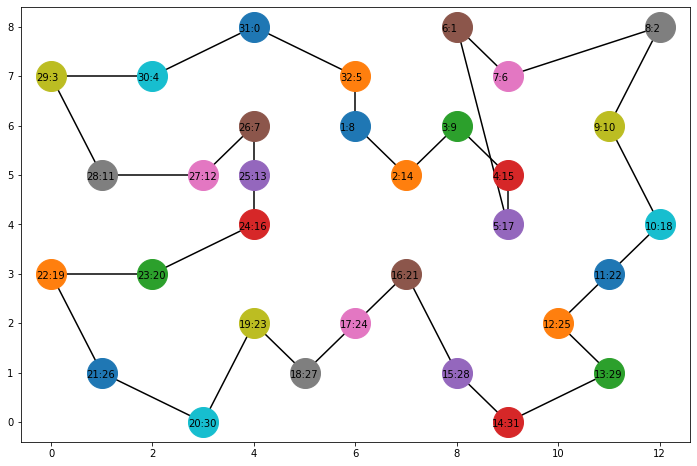

[8, 14, 9, 15, 17, 1, 6, 2, 10, 18, 22, 25, 29, 31, 28, 21, 24, 27, 23, 30, 26, 19, 20, 16, 13, 7, 12, 11, 3, 4, 0, 5, 8] 58.85269378676085


In [55]:
melhor=min(lista_melhor)
fig,ax=plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)
for i in range(len(listaF[0].trajeto)-1):

  x =[lista_cidades[melhor.trajeto[i]][1],lista_cidades[melhor.trajeto[i+1]][1]]
  y =[lista_cidades[melhor.trajeto[i]][2],lista_cidades[melhor.trajeto[i+1]][2]]
  plt.plot(x,y,'k-')
ponto=1

for i in range(len(listaF[0].trajeto)-1):
  ax.plot(lista_cidades[melhor.trajeto[i]][1],lista_cidades[melhor.trajeto[i]][2], ls="", marker="o",markersize=30.0)
  ax.annotate(f'{ponto}:{melhor.trajeto[i]}',(lista_cidades[melhor.trajeto[i]][1]-.3,lista_cidades[melhor.trajeto[i]][2]-.1),fontsize=10)
  ponto+=1
plt.show()
print(melhor)